# Perceptron multicouches  - 1 couche cachée

Définition d'un perceptron multicouches à une couche cachée pour la classification de données de synthèse


Objectif : comprendre l'intérêt d'un perceptron multicouches pour la séparation non linéaire de données. Trois jeux de données sont proposés :

    - données linéairement séparables (linear)
    - données concentriques non linéairement séparables (twocircles)
    - données en croissant non linéairement séparables (moon)

On étudiera l'influence de la taille de la couche cachée sur la frontière de séparation et la performance du PMC

# Imports

In [1]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

# Données
Définition d'une fonction utile pour le chargement des données

In [2]:

# Nombre de classes
num_labels = 2 

# Nombre de descripteurs
num_features = 2

fichiers_train = ['../../data/simdata/linear_data_train.csv','../../data/simdata/twocircles_data_train.csv','../../data/simdata/moon_data_train.csv']
fichiers_test = ['../../data/simdata/linear_data_eval.csv','../../data/simdata/twocircles_data_eval.csv','../../data/simdata/moon_data_eval.csv']

In [3]:
# Extraction des données à partir de lignes label, desc1... descn en un format compatible
def extract_data(filename):

    labels = []
    features = []

    for line in open(filename):
        row = line.split(",")
        # Les labels sont des entiers
        labels.append(int(row[0]))
        # les descripteurs sont des réels
        features.append([float(x) for x in row[1:]])

    # Conversion en des types  matrices numpy
    features_np = np.matrix(features).astype(np.float32)

    labels_np = np.array(labels).astype(dtype=np.uint8)
    labels_onehot = (np.arange(num_labels) == labels_np[:, None]).astype(np.float32)

    return features_np,labels_onehot

# Affichage
Définition de la fonction d'affichage graphique des résultats (frontière de séparation et classes)

In [9]:
def plotResults(ax,X,Y,model,titre):
    # rectangle de tracé
    mins = np.amin(X,0); 
    mins = mins - 0.1*np.abs(mins);
    maxs = np.amax(X,0); 
    maxs = maxs + 0.1*maxs;

    ## Génération d'une grille
    xs,ys = np.meshgrid(np.linspace(mins[0,0],maxs[0,0],300),np.linspace(mins[0,1], maxs[0,1], 300));

    # Modèle sur la grille
    Z = np.argmax(model.predict(np.c_[xs.flatten(), ys.flatten()]), axis=-1)
    Z=Z.reshape(xs.shape[0],xs.shape[1])
    
    # conversion one shot vecteur
    labelY = np.matrix(Y[:, 0]+2*Y[:, 1])
    labelY = labelY.reshape(np.array(X[:, 0]).shape)

    ax.contourf(xs, ys, Z, cmap=plt.cm.magma,alpha=.5)
    ax.scatter(np.array(X[:, 0]),np.array(X[:, 1]),c= np.array(labelY),s=20,cmap=colors.ListedColormap(['red', 'green']))
    ax.set_title(titre)
    plt.tight_layout()

# Définition du réseau

## Paramètres du réseau

In [5]:
# Taille des batchs par apprentissage
batch_size = 100  

# Taille de la couche cachée
num_hidden = 5

# Nombre d'itérations
num_epochs = 1000

# learning rate
lr = 0.01


## Réseau

In [6]:
#TODO
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
output (Dense)               (None, 2)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


## Fonction de perte et optimiseur

In [7]:
#TODO


# Entraînement et affichage des résultats

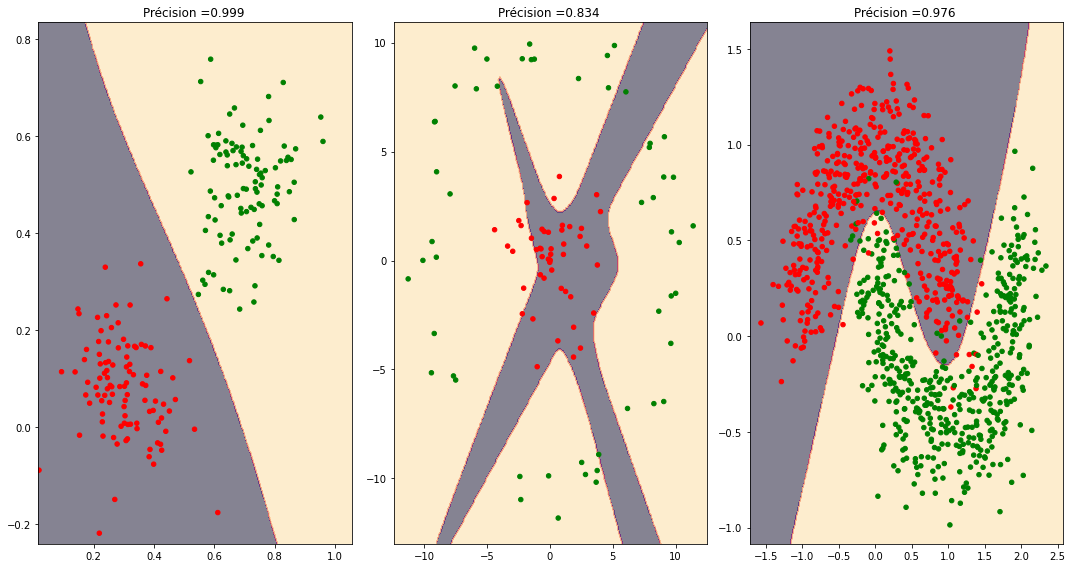

In [10]:
fig,axs = plt.subplots(1, 3,figsize=(15,8))
for i,name_train,name_test in zip ([0,1,2],fichiers_train,fichiers_test):
    train_data,train_labels = extract_data(name_train)
    test_data, test_labels = extract_data(name_test)
    train_size,num_features = train_data.shape
    
    

    # Entraînement
    hist=model.fit(train_data, train_labels, epochs=num_epochs, batch_size=batch_size,verbose=0)
    titre= "Précision ={0:5.3f} ".format(hist.history.get('acc')[-1])
    plotResults(axs[i],test_data, test_labels, model, titre)
    